### Problem Statement:
### For a bike sharing system using multiple linear regression we need to identify the variables that are significant in predicting the demand for shared bikes. We will also find out the significance of these variables in describing the bike demand.

### Step 1: Reading and understanding data

In [262]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [263]:
# import the data set into a data frame
bikes= pd.read_csv("day.csv")
pd.set_option("display.max_columns",500)

In [264]:
# check some rows in the data frame
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [265]:
# get shape of data frame
bikes.shape

(730, 16)

In [266]:
# get columns info 
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### There don't seem to be any null value in any of the columns

In [267]:
# dropping unncessary columns

# dropping instant as it shows index only and not required for prediction
# dropping dteday as the required data is already present in year and mnth
# dropping atemp as the temp recorded in temp field alone is sufficient
# dropping casual and registered as the variables are redundant and the total count is present in cnt variable 
bikes.drop(['instant','dteday','atemp','casual','registered'],axis=1,inplace=True)

## Step 2: Data Visualisation

### Understanding the correlation between numeric variables using pair plot

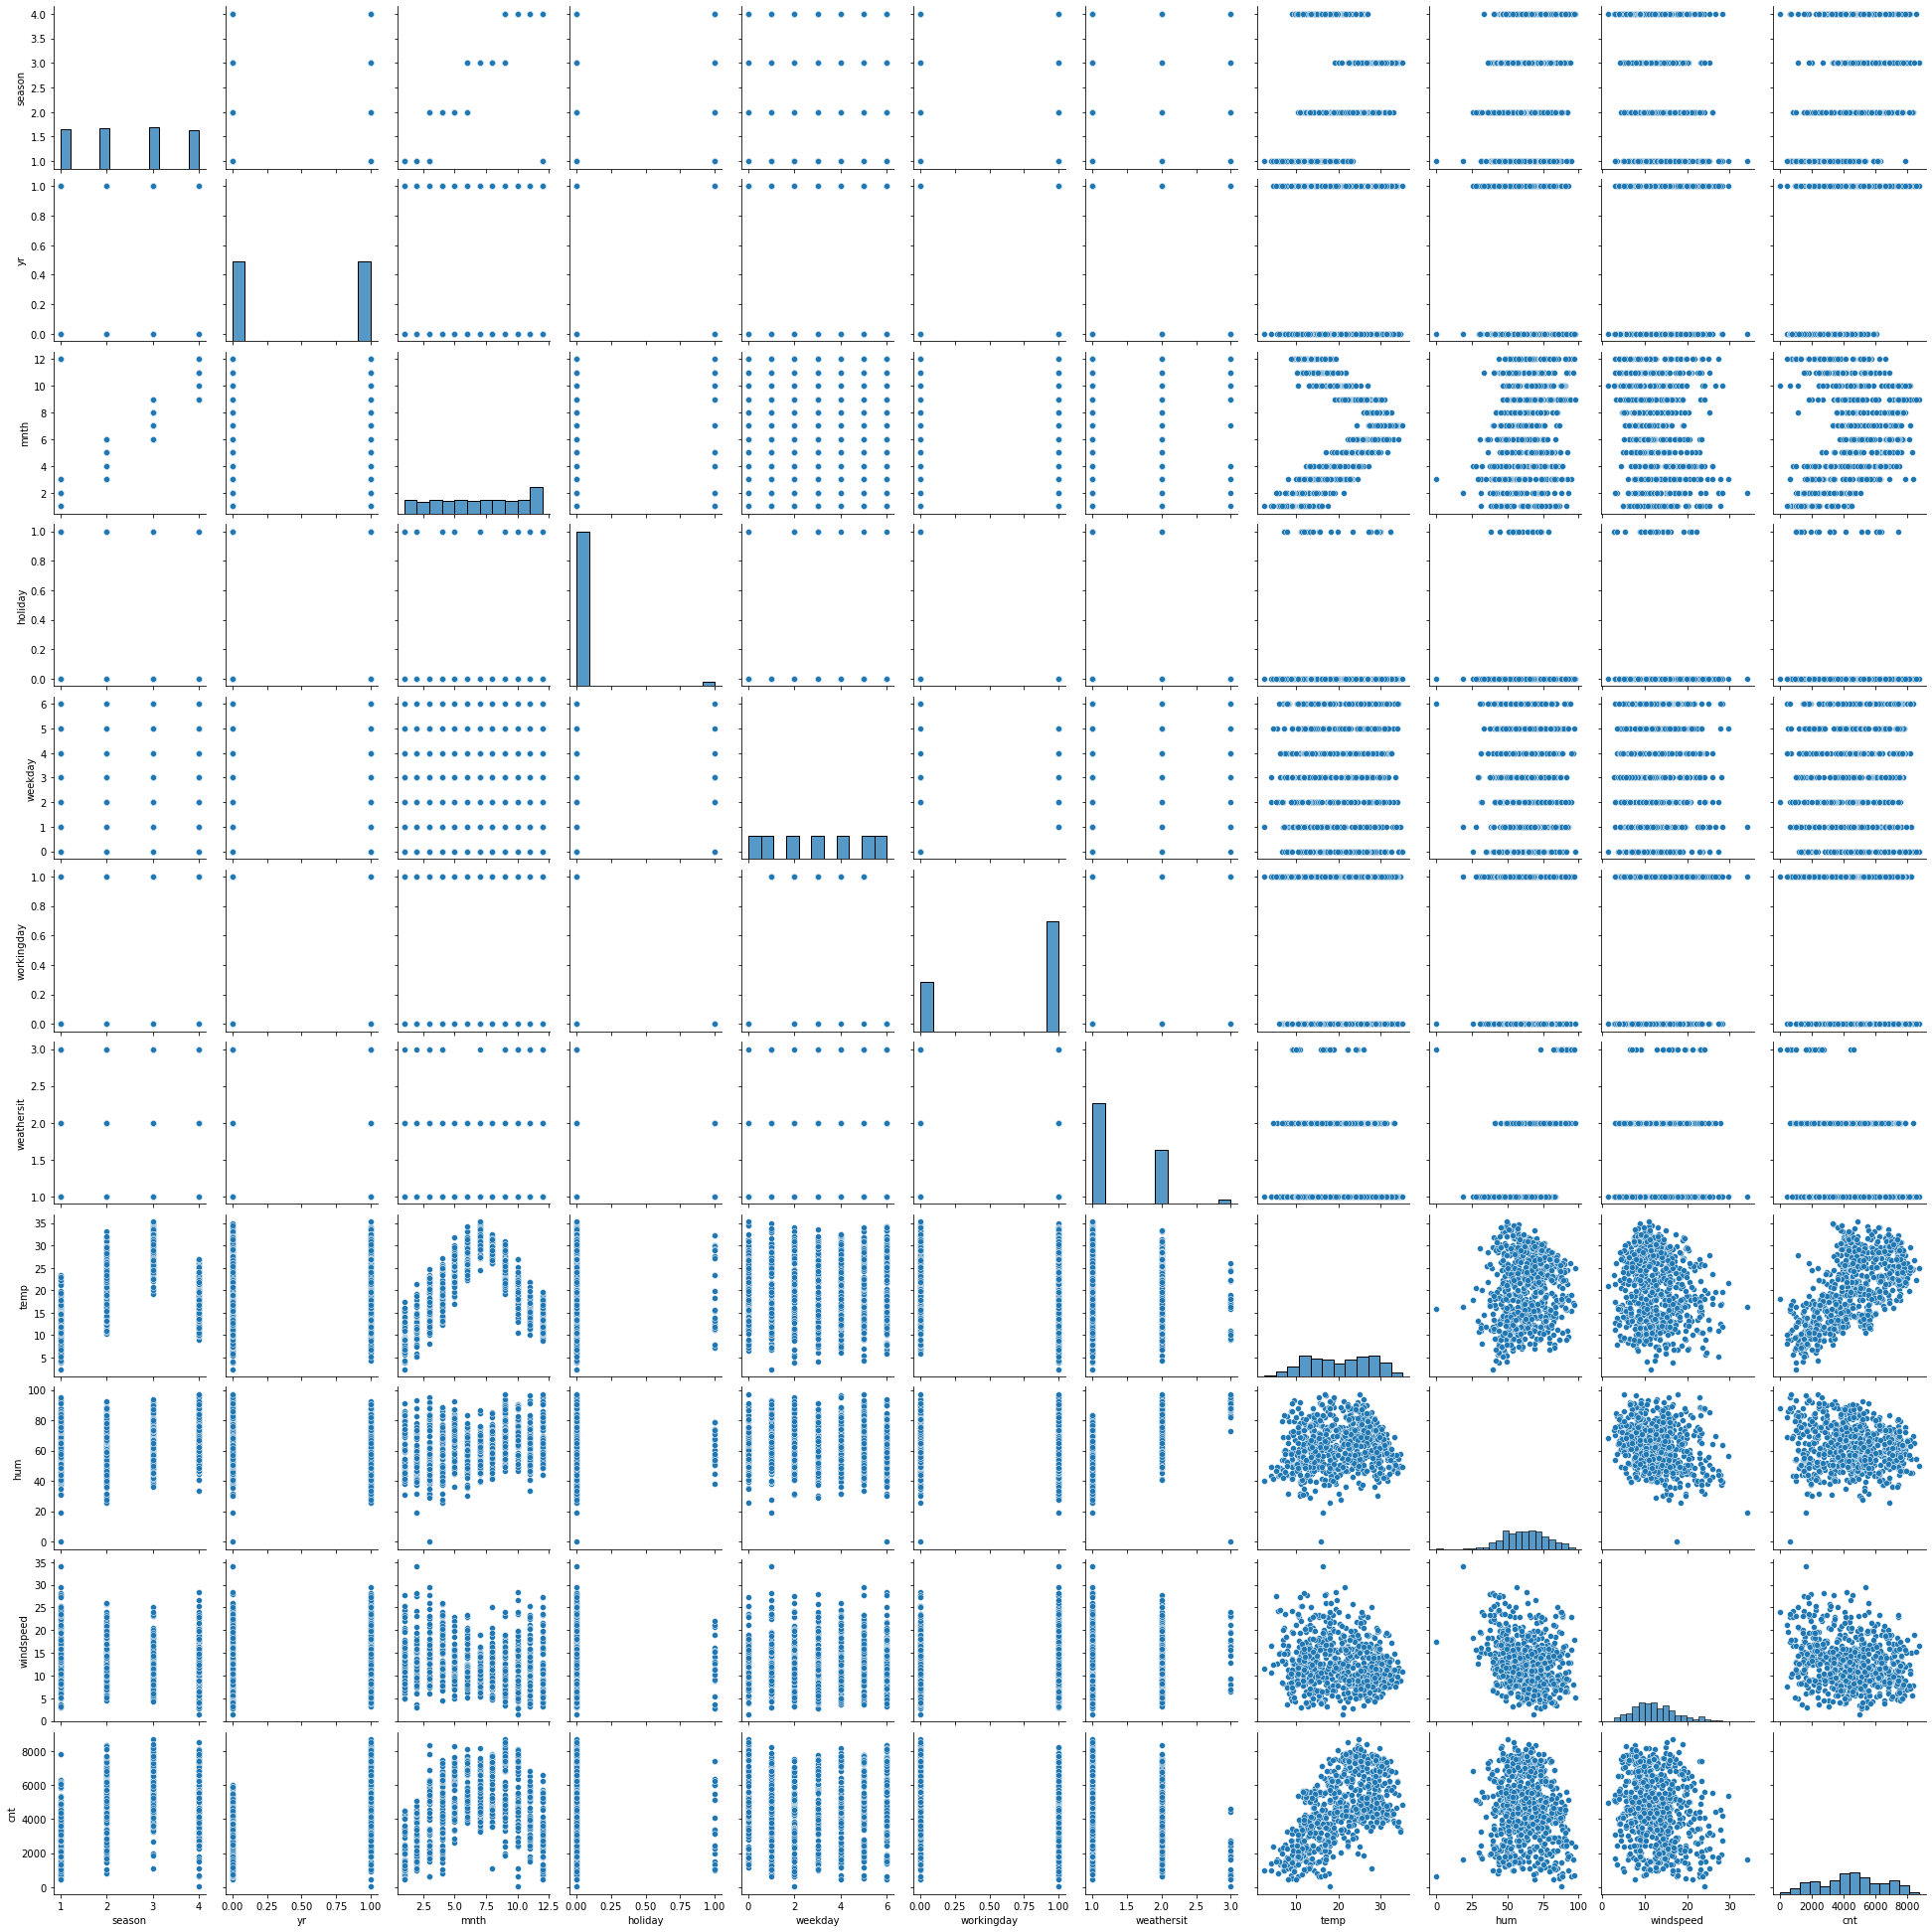

In [268]:
sns.pairplot(bikes)
plt.show()

### Few variables seem to have a linear relationship with cnt variable hence linear regression can be done. Temp field has the highest correlation with the target variable cnt.

### Plotting a heat map to check correlation coefficient between various numerical variables

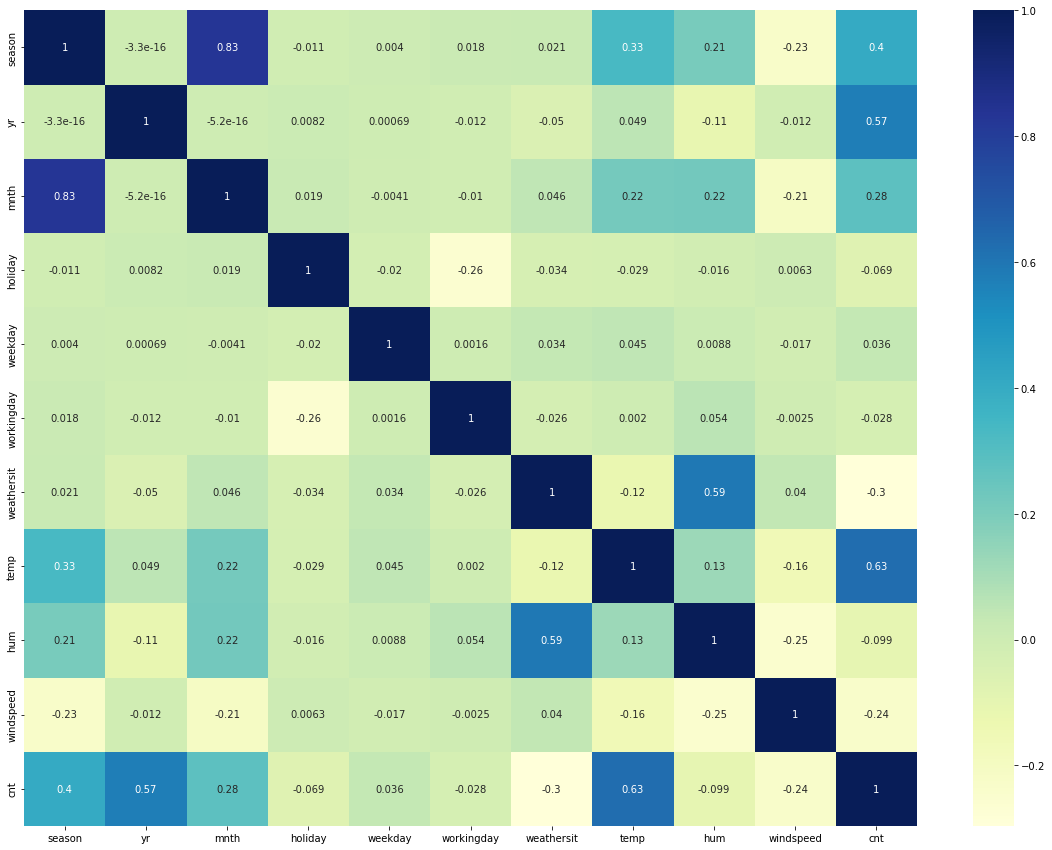

In [269]:
plt.figure(figsize=(20,15))
sns.heatmap(bikes.corr(),cmap="YlGnBu",annot=True)
plt.show()

### Temp field has the highest correlation value of 0.63 with cnt.

### Visualization using box plot for categorical variables

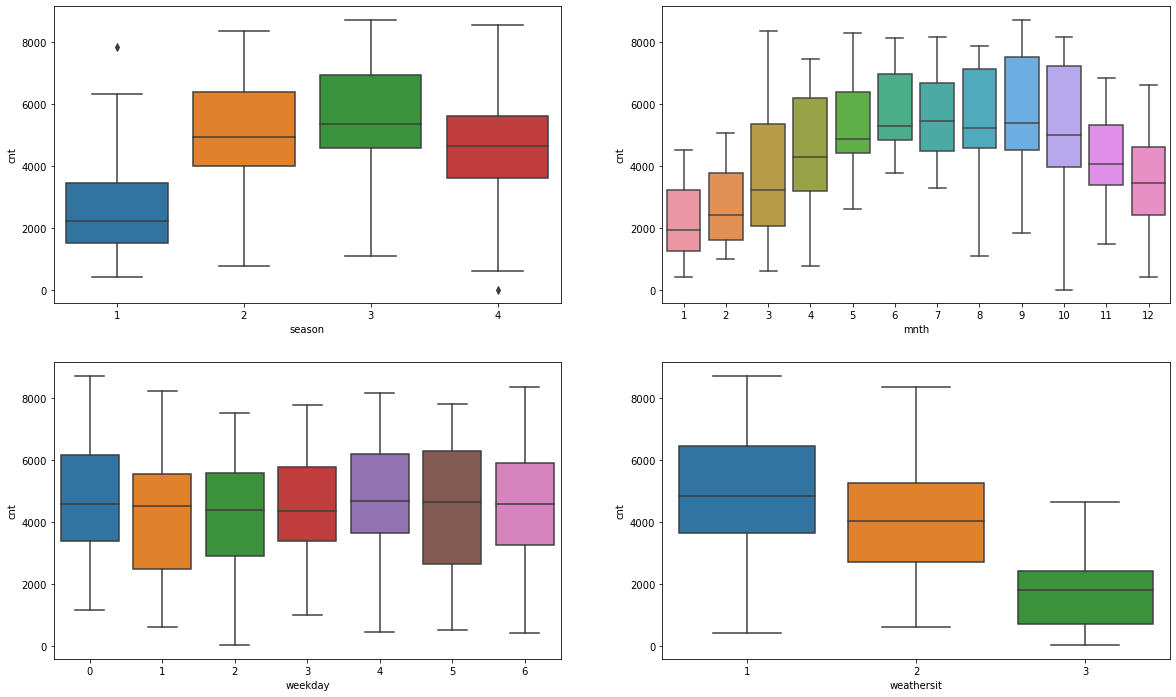

In [270]:

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(bikes.season,bikes.cnt)
plt.subplot(2,2,2)
sns.boxplot(bikes.mnth,bikes.cnt)
plt.subplot(2,2,3)
sns.boxplot(bikes.weekday,bikes.cnt)
plt.subplot(2,2,4)
sns.boxplot(bikes.weathersit,bikes.cnt)
plt.show()

### The above plot shows how cnt varies for different values of categorical variables

## Step 3 :Data Preparation

### we have the following categorical variables - season, mnth, weekday, weathersit. They currently have numeric values. We can convert them into string values and later create dummies for them.

In [271]:
# create string categorical variables for seasons, mnth, weekday, weathersit
def season_names(row):
    if row["season"]==1:
        return "spring"
    elif row["season"]==2:
        return "summer"
    elif row["season"]==3:
        return "fall"
    elif row["season"]==4:
        return "winter"
bikes["season_name"]=bikes.apply(season_names,axis=1)

def month_names(row):
    if row["mnth"]==1:
        return "January"
    elif row["mnth"]==2:
        return "February"
    elif row["mnth"]==3:
        return "March"
    elif row["mnth"]==4:
        return "April"
    elif row["mnth"]==5:
        return "May"
    elif row["mnth"]==6:
        return "June"
    elif row["mnth"]==7:
        return "July"
    elif row["mnth"]==8:
        return "August"
    elif row["mnth"]==9:
        return "September"
    elif row["mnth"]==10:
        return "October"
    elif row["mnth"]==11:
        return "November"
    else:
        return "December"
bikes["mnth_name"]=bikes.apply(month_names,axis=1)

def weekday_names(row):
    if row["weekday"]==1:
        return "Sunday"
    elif row["weekday"]==2:
        return "Monday"
    elif row["weekday"]==3:
        return "Tuesday"
    elif row["weekday"]==4:
        return "Wednesday"
    elif row["weekday"]==5:
        return "Thursday"
    elif row["weekday"]==6:
        return "Friday"
    else:
        return "Saturday"
bikes["weekday_name"]=bikes.apply(weekday_names,axis=1)

def weather_labels(row):
    if row["weathersit"]==1:
        return "clear"
    elif row["weathersit"]==2:
        return "mist"
    elif row["weathersit"]==3:
        return "light"
    elif row["weathersit"]==4:
        return "heavy"
bikes["weather"]=bikes.apply(weather_labels,axis=1)

In [272]:
# checking the categorical values created for the above variables
bikes.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_name,mnth_name,weekday_name,weather
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,spring,January,Sunday,mist
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,spring,January,Monday,mist
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349,spring,January,Tuesday,clear
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562,spring,January,Wednesday,clear
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600,spring,January,Thursday,clear
5,1,0,1,0,6,0,1,8.378268,51.8261,6.000868,1606,spring,January,Friday,clear
6,1,0,1,0,0,0,2,8.057402,49.8696,11.304642,1510,spring,January,Saturday,mist
7,1,0,1,0,1,1,2,6.765000,53.5833,17.875868,959,spring,January,Sunday,mist
8,1,0,1,0,2,1,1,5.671653,43.4167,24.250650,822,spring,January,Monday,clear
9,1,0,1,0,3,1,1,6.184153,48.2917,14.958889,1321,spring,January,Tuesday,clear


### Creating dummy values for categorical variables using one-hot encoding

In [273]:
# creating separate dataframe for each categorical variable
season_df=pd.get_dummies(bikes["season_name"],drop_first=True)
month_df=pd.get_dummies(bikes["mnth_name"],drop_first=True)
weekday_df=pd.get_dummies(bikes["weekday_name"],drop_first=True)
weather_df=pd.get_dummies(bikes["weather"],drop_first=True)

# contatenating all dataframes to bikes dataframe
bikes=pd.concat([bikes,season_df,month_df,weekday_df,weather_df],axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_name,mnth_name,weekday_name,weather,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light,mist
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,spring,January,Sunday,mist,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,spring,January,Monday,mist,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349,spring,January,Tuesday,clear,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562,spring,January,Wednesday,clear,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600,spring,January,Thursday,clear,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [274]:
# dropping season , weathersit, weekday,mnth and their corresponding string categorical variables as we have 
#created dummy values
bikes.drop(['season','weathersit','weekday','mnth','season_name','mnth_name','weekday_name','weather'], axis = 1, inplace = True)

In [275]:
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light,mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Step 4 : Splitting data into train and test set

In [276]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(bikes,train_size=0.7,random_state=100)

### Rescaling the Features 

Using MinMax scaling.

In [277]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [278]:
# scaling numeric variables which are not in the range between 0 and 1
num_vars = ['temp',  'hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [279]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light,mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [280]:
# check the shape of the training set
df_train.shape

(510, 29)

### Dividing into X and y for model building

In [281]:
# cnt is our target variable. 
# We need to identify the signifance of independent variables in predicting the target variable 
y_train=df_train.pop("cnt") # contains only cnt variable
X_train=df_train # contains all variables except cnt

In [282]:
df_train.shape

(510, 28)

## Step 4 : Model Building

In [283]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output variable count equal to 15 out of the 28 variables available
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [284]:
# shows whether each variable is included or not
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 10),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('March', False, 14),
 ('May', False, 9),
 ('November', True, 1),
 ('October', False, 13),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 12),
 ('Sunday', False, 7),
 ('Thursday', False, 5),
 ('Tuesday', False, 6),
 ('Wednesday', False, 4),
 ('light', True, 1),
 ('mist', True, 1)]

In [285]:
col = X_train.columns[rfe.support_]
col
# columns supported by RFE

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'January', 'July', 'November', 'September',
       'light', 'mist'],
      dtype='object')

In [286]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [287]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [288]:
# running the linear model and checking statistical summary
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          8.15e-189
Time:                        17:45:46   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.000       0.249       0.391
yr             0.2304      0.008     28.487      0.000       0.215       0.246
holiday       -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp           0.4815      0.037     13.005      0.000       0.409       0.554
hum           -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed     -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring        -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer         0.0423      0.015      2.761      0.006       0.012       0.072
winter         0.1019      0.018      5.656      0.000       0.067       0.137
December      -0.0355      0.018     -2.024      0.043      -0.070      -0.001
January       -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July          -0.0553      0.018     -3.030      0.003      -0.091      -0.019
November      -0.0387      0.019     -2.057      0.040      -0.076      -0.002
September      0.0755      0.017      4.466      0.000       0.042       0.109
light         -0.2465      0.026     -9.331      0.000      -0.298      -0.195
mist          -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Since no variable has p-value greater than 0.05, checking the VIF

In [289]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'January', 'July', 'November', 'September',
       'light', 'mist'],
      dtype='object')

In [290]:
# Calculate the VIFs for the independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,mist,2.32
0,yr,2.09
11,November,1.85
9,January,1.75


In [291]:
# dropping hum as it has high VIF
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [292]:
# rebuilding the model after dropping variables
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          4.75e-186
Time:                        17:45:46   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.000       0.182       0.308
yr             0.2345      0.008     28.687      0.000       0.218       0.251
holiday       -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp           0.4387      0.036     12.093      0.000       0.367       0.510
windspeed     -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring        -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer         0.0349      0.015      2.251      0.025       0.004       0.065
winter         0.0869      0.018      4.831      0.000       0.052       0.122
December      -0.0428      0.018     -2.413      0.016      -0.078      -0.008
January       -0.0500      0.018     -2.719      0.007      -0.086      -0.014
July          -0.0500      0.019     -2.703      0.007      -0.086      -0.014
November      -0.0395      0.019     -2.064      0.040      -0.077      -0.002
September      0.0687      0.017      4.015      0.000       0.035       0.102
light         -0.2917      0.025    -11.840      0.000      -0.340      -0.243
mist          -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
# Calculate the VIFs for the independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,November,1.81
8,January,1.66
9,July,1.59
13,mist,1.57


### Now all variables are significant since p-value is less than 0.05 and not redundant since VIF<=5

### R2_score and Adjusted R2_score using training set is 0.839 and 0.835 respectively

## Step 5: Residual Analysis of the train data

Checking whether the error terms follow normal distribution which is one of the major assumptions of 
linear regression.Plotting the histogram of the error terms.

In [294]:
# predicting the target variable
y_train_cnt = lm.predict(X_train_lm)

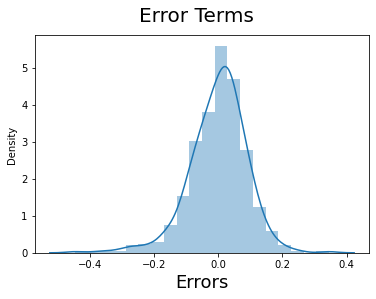

In [295]:
# plotting a distplot to check distribution of error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

### Error terms are normal distributed with mean 0 hence our model is valid

## Step 6 : Prediction and Evaluation using the test set

In [296]:
# Applying scaling on test set
num_vars = ['temp',  'hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [297]:
# Dividing into X & y
y_test = df_test.pop('cnt')
X_test = df_test

In [298]:
# Using the model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [299]:
# Making predictions
y_pred = lm.predict(X_test_new)

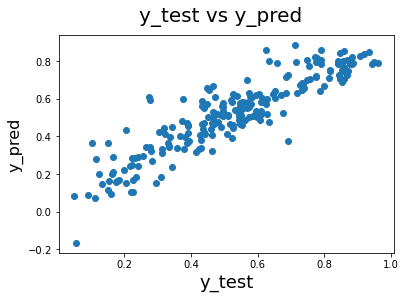

In [300]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  # y-label
plt.show()

## Checking the R2_score for test data set

In [301]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8136761325817871

### R2_score for test is 0.813 which is closer to the R2_score obtained for training set. This proves the model is best fit and its predictive quality is good.

### Inference: 
Variables which are highly significant in predicting the demand are temperature, year, light weather (weathersit)  and wind speed. Temperature and year are positively related whereas light weather(weathersit) and wind speed are inversely related to demand.